<a href="https://colab.research.google.com/github/JeroFerrer93/python-ciencia-datos/blob/main/TPFINAL_Jeronimo_Ferrer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP FINAL

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.

**Ejercicio 4**\
Detectar Valores Ausente  y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

**Para los que entregan en blanco**

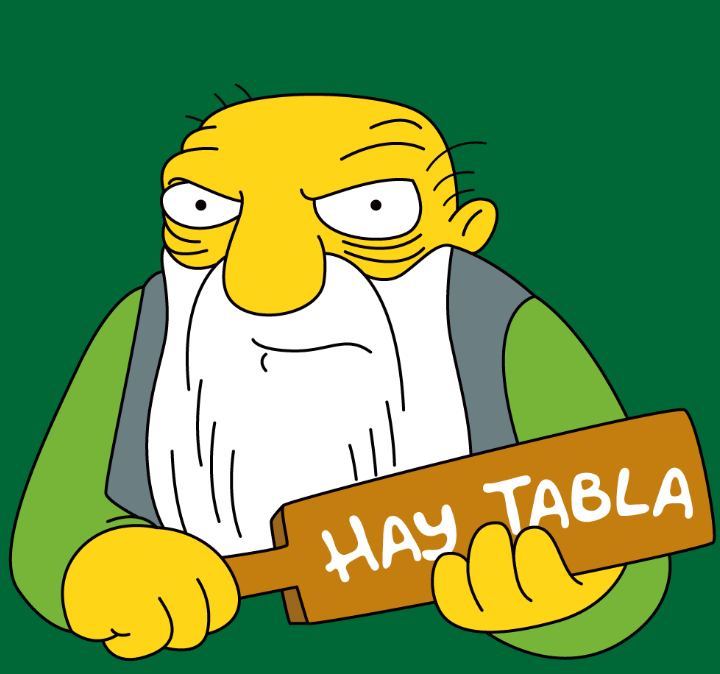

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
SPY = pd.read_csv('SPY.csv')
T = pd.read_csv('T.csv')
AAPL = pd.read_csv('AAPL.csv')
DIS = pd.read_csv('DIS.csv')
GOLD = pd.read_csv('GOLD.csv')
IBM = pd.read_csv('IBM.csv')
KO = pd.read_csv('KO.csv')
MMM = pd.read_csv('MMM.csv')
MSFT = pd.read_csv('MSFT.csv')

print(SPY.head())
print(T.head())

         Date       Open        High         Low      Close  Adj Close  \
0  2000-09-01  153.25000  153.593750  152.000000  152.50000  99.674843   
1  2000-09-05  151.87500  152.203125  150.812500  151.28125  98.878258   
2  2000-09-06  151.18750  151.953125  149.531250  149.56250  97.754883   
3  2000-09-07  150.25000  151.078125  149.828125  150.84375  98.592331   
4  2000-09-08  150.28125  150.500000  149.328125  149.81250  97.918243   

    Volume  
0  3191200  
1  3470800  
2  4322200  
3  4265500  
4  3518200  
         Date       Open       High        Low      Close  Adj Close    Volume
0  2000-09-01  32.335724  32.571751  31.533234  32.430138   6.677131   6791193
1  2000-09-05  32.524548  32.713367  32.146904  32.618958   6.716009   4814594
2  2000-09-06  32.666164  33.232628  32.288521  32.382931   6.667410   6281586
3  2000-09-07  32.335724  32.571751  32.194111  32.288521   6.647971   4611227
4  2000-09-08  32.241314  34.318352  32.194111  34.035122   7.007585  12144258


En el mundo de las finanzas hay diferentes gurús financieros con diversas recetas para el éxito. Todos quieren batir al mercado (SPY) pero pocos han sido capaces de hacerlo y menos aun hacerlo de manera sostenida en el tiempo. Por lo que lo que se suele recomendar invertir en ETF (Exchange Trade Fund) que en el caso del SPY es invertir en el indice de las 500 empresas más importantes de EEUU. En vez de intentar vencer al mercado, se lo copia.

Para ver si es cierto que conviene mas invertir en el mercado que elegir empresas para intentar superarlo, vamos a comparar los rendimientos del SPY frente a las empresas más importantes desde el año 2000 hasta el 2023.

In [4]:
nulos_SPY = SPY.isnull().sum()
nulos_T = T.isnull().sum()
nulos_AAPL = AAPL.isnull().sum()
nulos_DIS = DIS.isnull().sum()
nulos_GOLD = GOLD.isnull().sum()
nulos_IBM = IBM.isnull().sum()
nulos_KO = KO.isnull().sum()
nulos_MMM = MMM.isnull().sum()
nulos_MSFT = MSFT.isnull().sum()

print("\nValores nulos en el DataFrame SPY:")
print(nulos_SPY)
print("Valores nulos en el DataFrame T:")
print(nulos_T)
print("\nValores nulos en el DataFrame AAPL:")
print(nulos_AAPL)
print("\nValores nulos en el DataFrame DIS:")
print(nulos_DIS)
print("\nValores nulos en el DataFrame GOLD:")
print(nulos_GOLD)
print("\nValores nulos en el DataFrame IBM:")
print(nulos_IBM)
print("\nValores nulos en el DataFrame KO:")
print(nulos_KO)
print("\nValores nulos en el DataFrame MMM:")
print(nulos_MMM)
print("\nValores nulos en el DataFrame MSFT:")
print(nulos_MSFT)



Valores nulos en el DataFrame SPY:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Valores nulos en el DataFrame T:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores nulos en el DataFrame AAPL:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores nulos en el DataFrame DIS:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores nulos en el DataFrame GOLD:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores nulos en el DataFrame IBM:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores nulos en el DataFrame KO:
Date         0
Open         0
High        

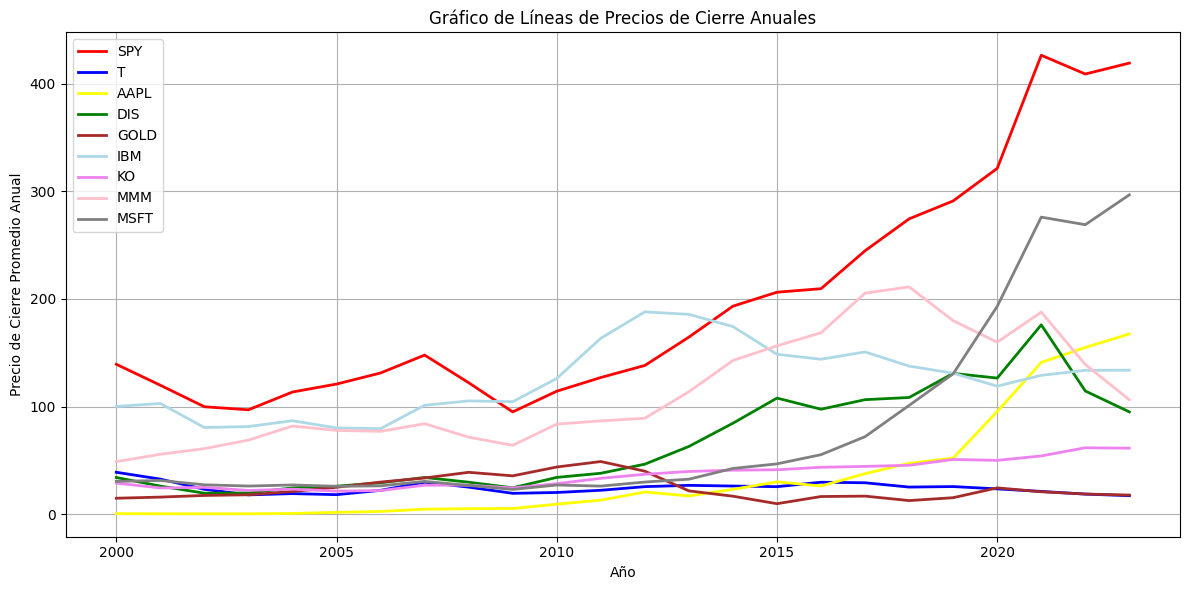

In [5]:
SPY['Date'] = pd.to_datetime(SPY['Date'])
T['Date'] = pd.to_datetime(T['Date'])
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
DIS['Date'] = pd.to_datetime(DIS['Date'])
GOLD['Date'] = pd.to_datetime(GOLD['Date'])
IBM['Date'] = pd.to_datetime(IBM['Date'])
KO['Date'] = pd.to_datetime(KO['Date'])
MMM['Date'] = pd.to_datetime(MMM['Date'])
MSFT['Date'] = pd.to_datetime(MSFT['Date'])


# Agrupar los datos por año y calcular el promedio de los precios de cierre para cada año
precios_cierre_SPY_anual = SPY.groupby(SPY['Date'].dt.year)['Close'].mean()
precios_cierre_T_anual = T.groupby(T['Date'].dt.year)['Close'].mean()
precios_cierre_AAPL_anual = AAPL.groupby(T['Date'].dt.year)['Close'].mean()
precios_cierre_DIS_anual = DIS.groupby(SPY['Date'].dt.year)['Close'].mean()
precios_cierre_GOLD_anual = GOLD.groupby(T['Date'].dt.year)['Close'].mean()
precios_cierre_IBM_anual = IBM.groupby(SPY['Date'].dt.year)['Close'].mean()
precios_cierre_KO_anual = KO.groupby(T['Date'].dt.year)['Close'].mean()
precios_cierre_MMM_anual = MMM.groupby(T['Date'].dt.year)['Close'].mean()
precios_cierre_MSFT_anual = MSFT.groupby(SPY['Date'].dt.year)['Close'].mean()

# Obtener las fechas anuales
fechas_anuales_SPY = precios_cierre_SPY_anual.index
fechas_anuales_T = precios_cierre_T_anual.index
fechas_anuales_AAPL = precios_cierre_AAPL_anual.index
fechas_anuales_DIS = precios_cierre_DIS_anual.index
fechas_anuales_GOLD = precios_cierre_GOLD_anual.index
fechas_anuales_IBM = precios_cierre_IBM_anual.index
fechas_anuales_KO = precios_cierre_KO_anual.index
fechas_anuales_MMM = precios_cierre_MMM_anual.index
fechas_anuales_MSFT = precios_cierre_MSFT_anual.index

plt.figure(figsize=(12, 6))
plt.plot(fechas_anuales_SPY, precios_cierre_SPY_anual, label='SPY', color='red', linewidth=2)
plt.plot(fechas_anuales_T, precios_cierre_T_anual, label='T', color='blue', linewidth=2)
plt.plot(fechas_anuales_AAPL, precios_cierre_AAPL_anual, label='AAPL', color='yellow', linewidth=2)
plt.plot(fechas_anuales_DIS, precios_cierre_DIS_anual, label='DIS', color='green', linewidth=2)
plt.plot(fechas_anuales_GOLD, precios_cierre_GOLD_anual, label='GOLD', color='brown', linewidth=2)
plt.plot(fechas_anuales_IBM, precios_cierre_IBM_anual, label='IBM', color='lightblue', linewidth=2)
plt.plot(fechas_anuales_KO, precios_cierre_KO_anual, label='KO', color='violet', linewidth=2)
plt.plot(fechas_anuales_MMM, precios_cierre_MMM_anual, label='MMM', color='pink', linewidth=2)
plt.plot(fechas_anuales_MSFT, precios_cierre_MSFT_anual, label='MSFT', color='grey', linewidth=2)

plt.title('Gráfico de Líneas de Precios de Cierre Anuales')
plt.xlabel('Año')
plt.ylabel('Precio de Cierre Promedio Anual')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


Análisis univariado de SPY:


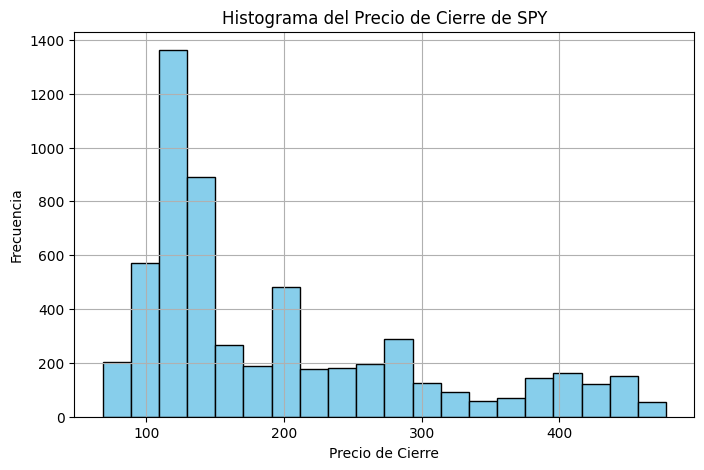

Media del Precio de Cierre: 195.30
Mediana del Precio de Cierre: 144.93
Desviación Estándar del Precio de Cierre: 103.44
Mínimo Precio de Cierre: 68.11
Máximo Precio de Cierre: 477.71


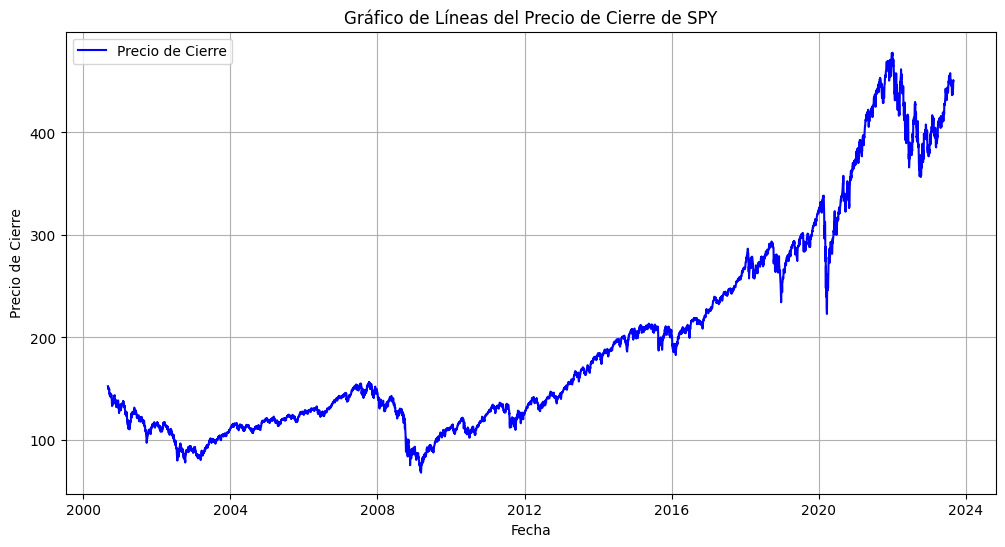



Análisis univariado de T:


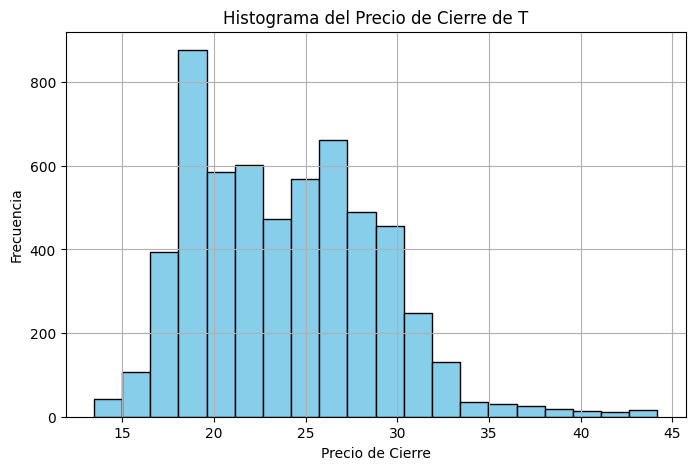

Media del Precio de Cierre: 23.92
Mediana del Precio de Cierre: 23.49
Desviación Estándar del Precio de Cierre: 4.93
Mínimo Precio de Cierre: 13.45
Máximo Precio de Cierre: 44.18


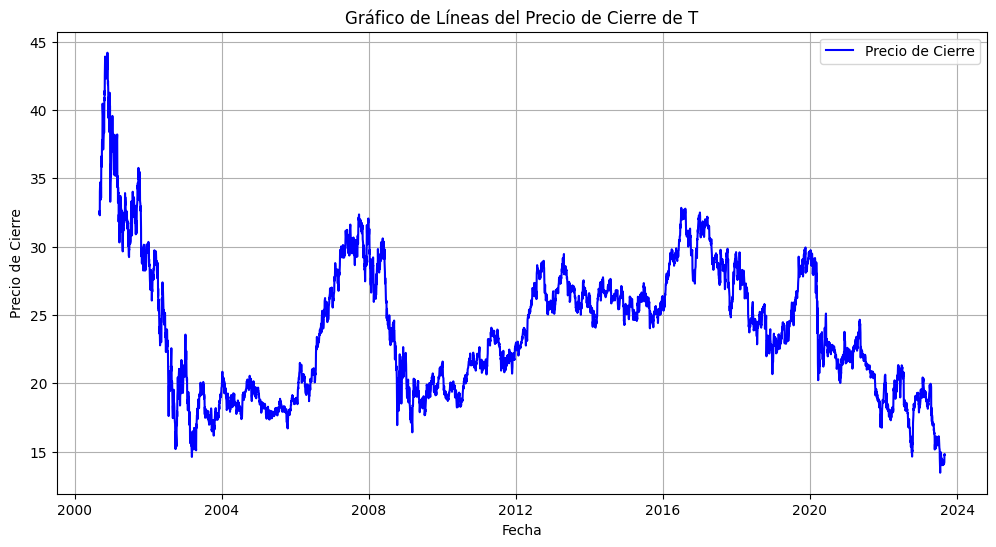



Análisis univariado de AAPL:


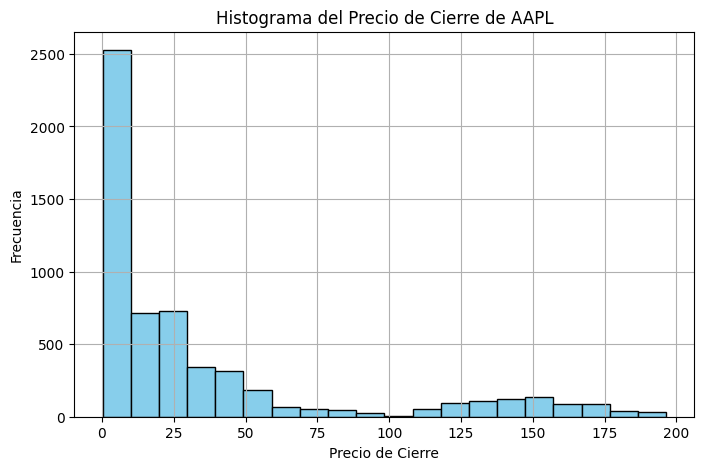

Media del Precio de Cierre: 34.77
Mediana del Precio de Cierre: 15.22
Desviación Estándar del Precio de Cierre: 48.70
Mínimo Precio de Cierre: 0.23
Máximo Precio de Cierre: 196.45


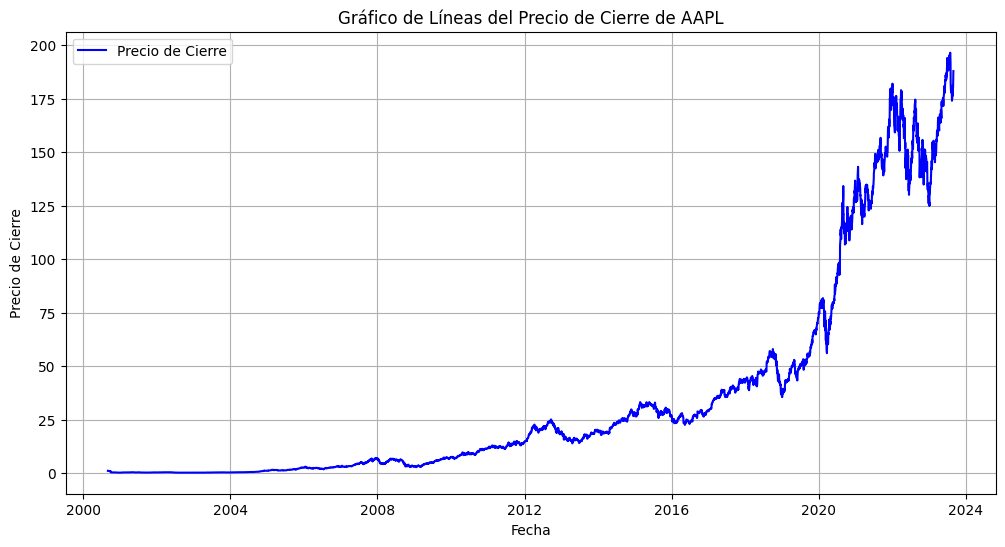



Análisis univariado de DIS:


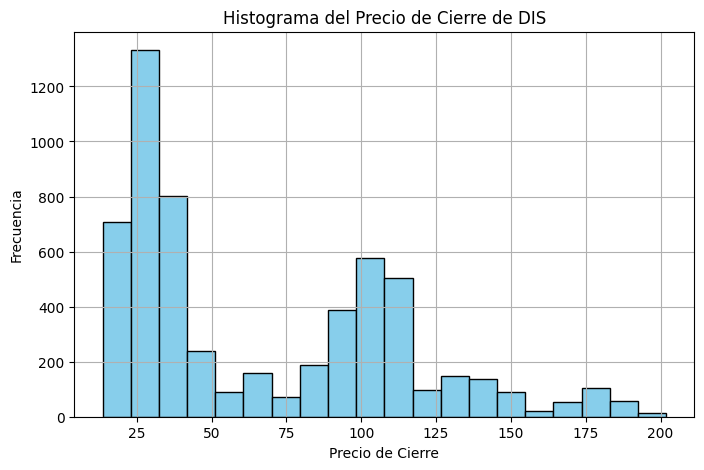

Media del Precio de Cierre: 67.03
Mediana del Precio de Cierre: 43.06
Desviación Estándar del Precio de Cierre: 45.67
Mínimo Precio de Cierre: 13.58
Máximo Precio de Cierre: 201.91


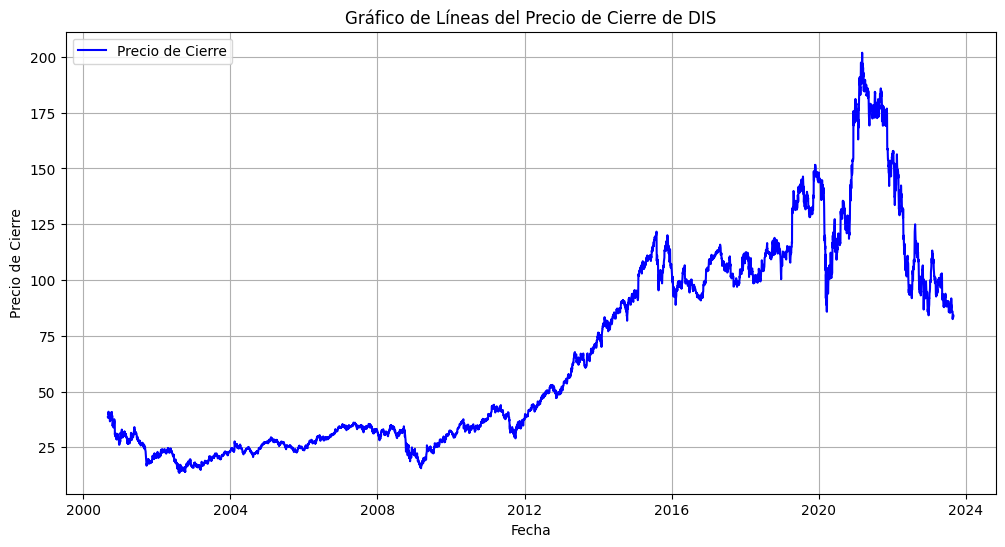



Análisis univariado de GOLD:


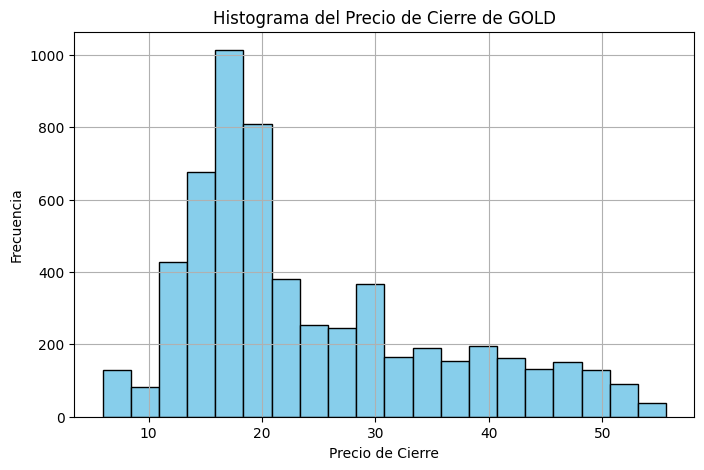

Media del Precio de Cierre: 24.24
Mediana del Precio de Cierre: 19.88
Desviación Estándar del Precio de Cierre: 11.20
Mínimo Precio de Cierre: 5.94
Máximo Precio de Cierre: 55.63


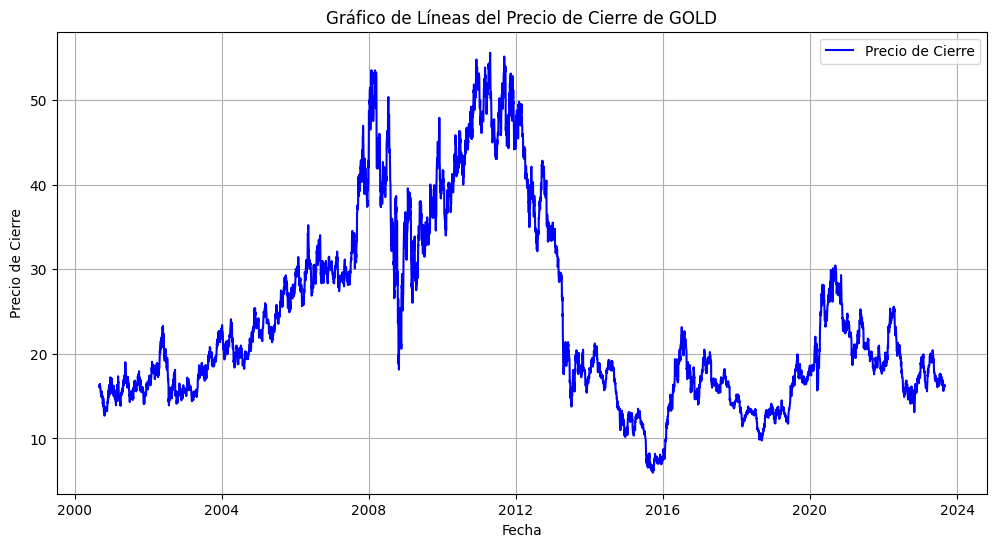



Análisis univariado de IBM:


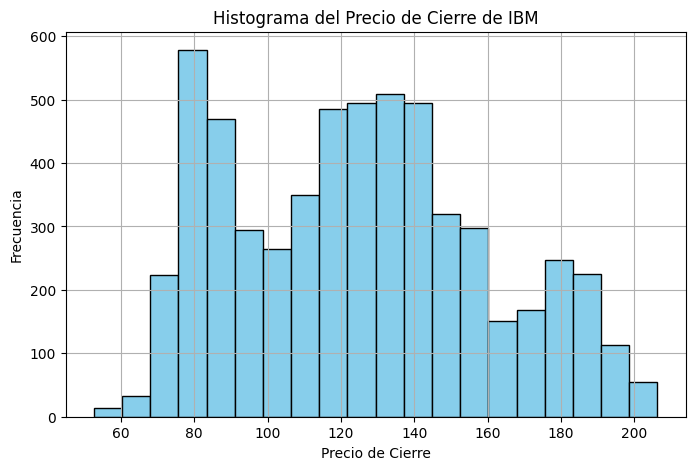

Media del Precio de Cierre: 124.99
Mediana del Precio de Cierre: 124.18
Desviación Estándar del Precio de Cierre: 34.40
Mínimo Precio de Cierre: 52.65
Máximo Precio de Cierre: 206.31


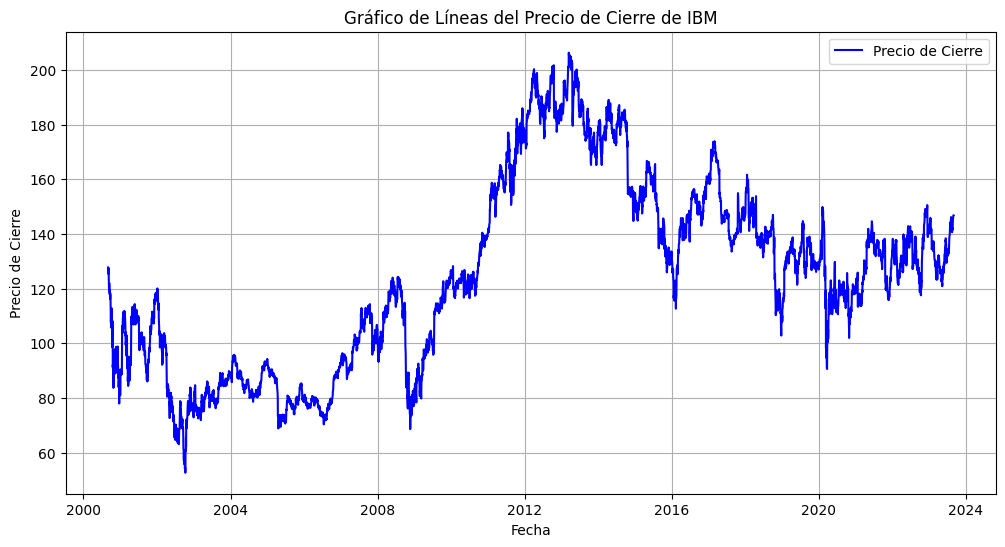



Análisis univariado de KO:


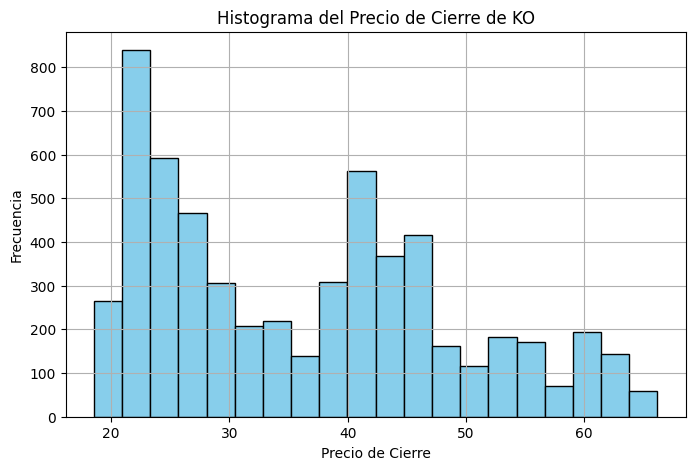

Media del Precio de Cierre: 36.38
Mediana del Precio de Cierre: 35.12
Desviación Estándar del Precio de Cierre: 12.56
Mínimo Precio de Cierre: 18.54
Máximo Precio de Cierre: 66.21


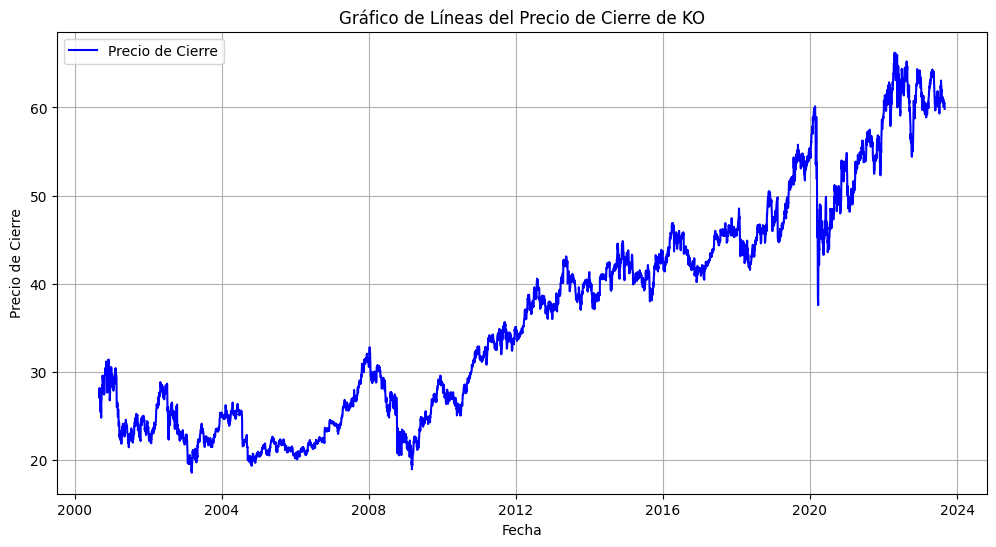



Análisis univariado de MMM:


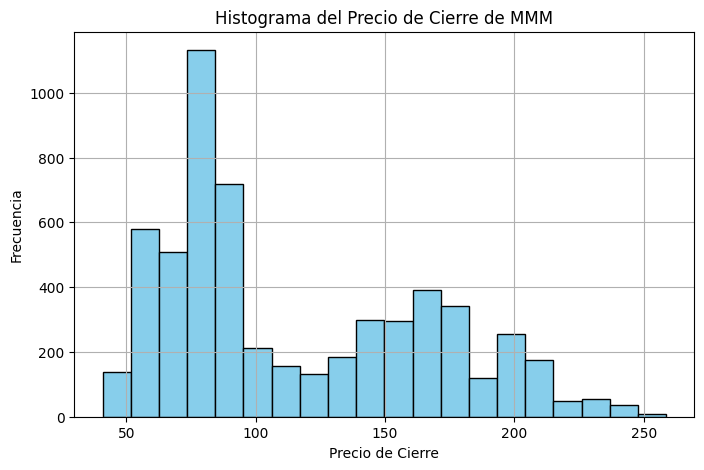

Media del Precio de Cierre: 115.34
Mediana del Precio de Cierre: 90.87
Desviación Estándar del Precio de Cierre: 50.68
Mínimo Precio de Cierre: 40.88
Máximo Precio de Cierre: 258.63


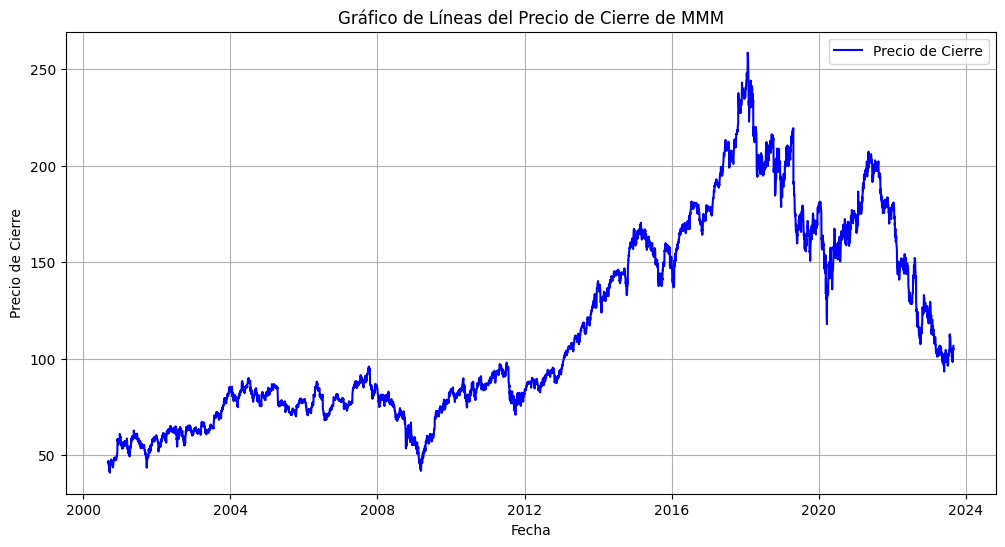



Análisis univariado de MSFT:


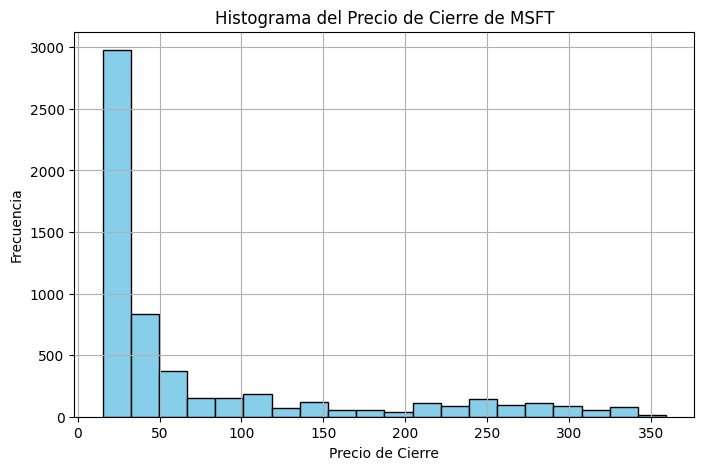

Media del Precio de Cierre: 76.23
Mediana del Precio de Cierre: 31.58
Desviación Estándar del Precio de Cierre: 84.55
Mínimo Precio de Cierre: 15.15
Máximo Precio de Cierre: 359.49


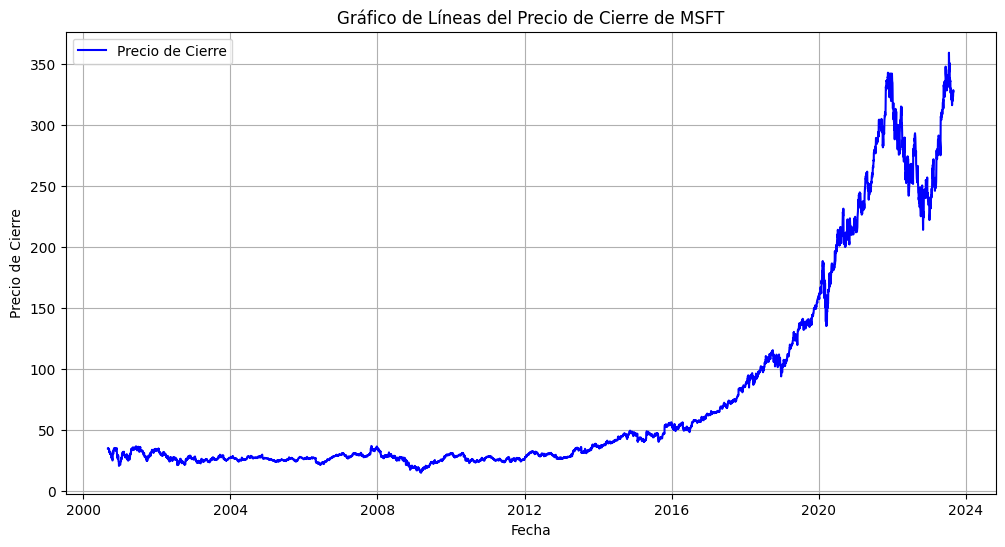

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


acciones = [SPY, T, AAPL, DIS, GOLD, IBM, KO, MMM, MSFT]
nombres_acciones = ["SPY", "T", "AAPL", "DIS", "GOLD", "IBM", "KO", "MMM", "MSFT"]

for accion, nombre in zip(acciones, nombres_acciones):
    print(f"Análisis univariado de {nombre}:")

    plt.figure(figsize=(8, 5))
    plt.hist(accion['Close'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma del Precio de Cierre de {nombre}')
    plt.xlabel('Precio de Cierre')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Estadísticas Descriptivas
    mean_price = accion['Close'].mean()
    median_price = accion['Close'].median()
    std_deviation = accion['Close'].std()
    min_price = accion['Close'].min()
    max_price = accion['Close'].max()

    print(f"Media del Precio de Cierre: {mean_price:.2f}")
    print(f"Mediana del Precio de Cierre: {median_price:.2f}")
    print(f"Desviación Estándar del Precio de Cierre: {std_deviation:.2f}")
    print(f"Mínimo Precio de Cierre: {min_price:.2f}")
    print(f"Máximo Precio de Cierre: {max_price:.2f}")

    plt.figure(figsize=(12, 6))
    plt.plot(accion['Date'], accion['Close'], color='blue', label='Precio de Cierre')
    plt.title(f'Gráfico de Líneas del Precio de Cierre de {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n" + "=" * 50 + "\n")


In [7]:
def calcular_aumento_porcentual(df):
    df = df.sort_values(by='Date')
    precio_inicial = df['Close'].iloc[0]
    precio_final = df['Close'].iloc[-1]
    aumento_porcentual = ((precio_final - precio_inicial) / precio_inicial) * 100
    return aumento_porcentual

acciones = [SPY, T, AAPL, DIS, GOLD, IBM, KO, MMM, MSFT]

for accion, df in zip(["SPY", "T", "AAPL", "DIS", "GOLD", "IBM", "KO", "MMM", "MSFT"], acciones):
    aumento_porcentual = calcular_aumento_porcentual(df)
    print(f"Aumento porcentual de {accion}: {aumento_porcentual:.2f}%")


Aumento porcentual de SPY: 195.31%
Aumento porcentual de T: -54.39%
Aumento porcentual de AAPL: 16484.38%
Aumento porcentual de DIS: 117.50%
Aumento porcentual de GOLD: 0.53%
Aumento porcentual de IBM: 14.94%
Aumento porcentual de KO: 120.57%
Aumento porcentual de MMM: 130.64%
Aumento porcentual de MSFT: 833.96%


In [8]:
for accion, df in zip(["SPY", "T", "AAPL", "DIS", "GOLD", "IBM", "KO", "MMM", "MSFT"], acciones):
    desviacion_estandar = df['Close'].std()
    print(f"Desviación estándar de {accion}: {desviacion_estandar:.2f}")


Desviación estándar de SPY: 103.44
Desviación estándar de T: 4.93
Desviación estándar de AAPL: 48.70
Desviación estándar de DIS: 45.67
Desviación estándar de GOLD: 11.20
Desviación estándar de IBM: 34.40
Desviación estándar de KO: 12.56
Desviación estándar de MMM: 50.68
Desviación estándar de MSFT: 84.55


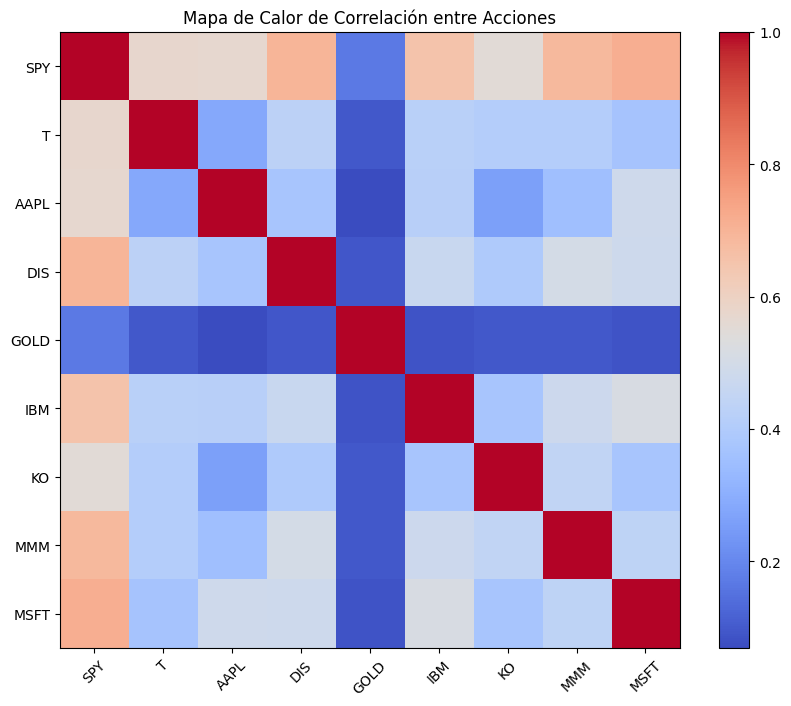

In [9]:
acciones = [SPY, T, AAPL, DIS, GOLD, IBM, KO, MMM, MSFT]
nombres_acciones = ["SPY", "T", "AAPL", "DIS", "GOLD", "IBM", "KO", "MMM", "MSFT"]

rendimientos = pd.DataFrame()
for i, df in enumerate(acciones):
    nombre_accion = nombres_acciones[i]
    rendimiento = df['Close'].pct_change().dropna()
    rendimientos[nombre_accion] = rendimiento

matriz_correlacion = rendimientos.corr()

plt.figure(figsize=(10, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(nombres_acciones)), nombres_acciones, rotation=45)
plt.yticks(range(len(nombres_acciones)), nombres_acciones)
plt.title('Mapa de Calor de Correlación entre Acciones')
plt.show()

En esta matriz de correlación podemos observar como acciones defensivas (menos volatiles) tales como AT&T, Coca-Cola y Barrick Gold tienen menor correlación con los movimientos del mercado (SPY).
Cuando queremos invertir en acciones más seguras (menos volátiles), buscamos las de menor desvío estandar, y que tengan menor Beta (correlación con el mercado).
Cuando el mercado sube, las que la impulsan suelen ser las acciones tecnológicas más innovadoras como AAPL y MSFT por ejemplo.
Para resumir, cuando el mercado sube, las acciones más convenientes serian las que mayor correlación tienen con el mercado y más riesgosas como AAPL y MSFT. Y cuando el mercado baja lo más conveniente es invertir en acciones defensivas con menor correlación con el mercado como GOLD, KO y T. En el caso de GOLD, es el refugio típico cuando el mercado baja ya que los inversores quieren tener commoditties como el oro para protegerse. Por el lado de KO y T, tienen productos que la gente sigue consumiendo aunque sean tiempos de crisis económicas, ya que seguiran usando servicios de teléfono e internet, y consumiendo bebidas.